In [3]:
import pickle
import pandas as pd
import numpy as np
from collections import Counter

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
inputfile = "/home/francisco/GitHub/DQN-Event-Summarization/data/cnn_tokenized/cnn_data_corpus.csv"
inputdict = "/home/francisco/GitHub/DQN-Event-Summarization/data/cnn_tokenized/cnn_total_corpus_smry.csv"

In [6]:
qdf = pd.read_csv(inputfile)
qdict = pd.read_csv(inputdict)

/home/francisco/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
queries = qdf['query_id']
sentences = qdf[[x for x in qdf.columns if 'stokens_' in x]]

true_summaries = {}
for queryid, true_summary in zip(queries, qdf['tstokens']):
    true_summaries[queryid] = Counter([int(x) for x in true_summary.split(" ")])

In [8]:
corpus_dict = dict(zip(qdict['id'].values, qdict['token'].values))

In [9]:
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for token in sentence:
        vec[token] += 1
    return vec.view(1, -1)

In [10]:
from joblib import Parallel, delayed

In [11]:
# Make a global variable
xs  = torch.zeros(sentences.shape[0], len(corpus_dict))

In [12]:
def tensorSentences(index):
    tokens = sentences['stokens_0'][index].split(" ")
    if len(tokens) > 0:
        xs[index, :] = make_bow_vector([int(s) for s in tokens], corpus_dict)

In [21]:
tst = [xs[0:5,0:5], xs[0:5,0:5]]

In [23]:
torch.save(tst, 'tst.pkl')

In [24]:
torch.load('tst.pkl')

[
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
 [torch.FloatTensor of size 5x5], 
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
 [torch.FloatTensor of size 5x5]]

In [13]:
Parallel(n_jobs=-1)(delayed(tensorSentences)(i) for i in range(sentences.shape[0]))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [9]:
train_xs = torch.zeros(sentences.shape[0], len(corpus_dict))
# train_ys = torch.from_numpy(np.random.random((n, 2))).float()  # Simulating the output

for i, row in enumerate(sentences['stokens_0']):
    tokens = row.split(" ")
    if len(tokens) > 0:
        train_xs[i, :] = make_bow_vector([int(s) for s in tokens], corpus_dict)
    else:
        pass

In [52]:
sentences.head()

,stokens_0,stokens_1,stokens_2,stokens_3,stokens_4,stokens_5,stokens_6,stokens_7,stokens_8,stokens_9,...,stokens_115,stokens_116,stokens_117,stokens_118,stokens_119,stokens_120,stokens_121,stokens_122,stokens_123,stokens_124
0,0 1 2 3 4 5 6 7,20001 8 9 10 0 11 12 13 14 0 20001 15 16 17 18...,0 23 51 14 52 53 54 55 56 23 57 58 59 9 60 61 ...,68 69 70 71 72 0 73 74 75 76 77 15 78 79 80 81...,0 94 90 37 69 14 0 95 9 26 78 79 96 20001 97 9...,37 96 107 108 15 109 4 20001 110 101 48 111 99...,123 0 124 125 126 127 128 129 4 130 131 37 132...,62 0 136 146 147 90 9 148 110 141 3 149 150 15...,164 165 166 167 118 168 169 170,171 172 173 174 140 175 176 177 178 179 180 18...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78 79 549 411 550 44 551 552 549 84 553 20001 ...,37 561 102 562 3 563 564 565 8 37 20001 23 566...,37 558 102 551 84 570 571 572 23 573 74 337 26...,394 84 570 574 56 105 558 20001 74 575 271 15 ...,84 582 583 82 83 551 582 583 584 110 585 3 586...,37 595 20001 32 37 553 596 161 202 302 302 315...,112 574 56 3 603 604 605 606 72 607 298 32 196...,605 23 58 614 615 616 346,37 617 618 196 619 37 620 612 621 74 37 622 62...,509 629 118 582 583 630 3 551 631 632 633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37 549 788 41 20001 756 8 78 79 572,37 789 110 37 579 790 791 105 792 153 793 794 ...,808 809 810 811 627 812 32 78 79 572 6 8 253 8...,8 822 68 110 339 823 824 37 825 826 827 110 78...,8 822 37 831 832 833 826 827 238 808 809 810 8...,834 78 79 572 835 37 35 836 837 110 253 838 3 ...,843 46 126 46 269 271 110 78 79 572 105 624 13...,843 9 849 315 136 850 851 198 852 3 853,78 79 572 105 854 855 41 856 857 858 99 253 83...,153 123 859 860 110 861 153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78 79 549 280 1168 105 1169 37 78 79 572 538 8...,37 1171 538 1179 71 280 284 9 1 1180 99 1172 9...,1185 1187 37 1188 1189 627 248 20001 1190 318 ...,1194 1195 507 9 551 1196 1188 1197 430 8 37 11...,153 105 9 720 720 1208 889 9 837 889 507 1209 ...,248 6 14 37 78 79 572 591 67 35 1211,37 551 1188 1212 1213 3 1184 15 37 799 800 801...,641 668 153 9 720 1225 1171 32 1226 435 1227,507 1209 784 32 1218 23 1228 15 536 1229 32 9 ...,1218 23 187 485 15 37 776 105 1236 102 9 907 1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78 79 549 139 1380 1381 318 9 1382 1383 8 1384...,9 1390 1391 869 8 1185 1392 1393 609 1394 223 ...,852 8 37 1397 316 1398,37 574 56 869 8 578 3 579 580 1399 15 90 7 140...,37 869 23 1405 896 37 1406 1407 110 1408 1409 ...,455 99 37 1414 1415 316 1036 15 1416 1333 14 1...,37 869 123 1421 280 1034 1422 852 218 15 37 80...,1385 316 861 989 74 1425 1426 3 1427 32 316 14...,99 560 1173 1385 1118 196 123 1431 37 1432 110...,37 1439 110 37 1430 23 58 1440 1091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sentence_dict = {}
sentence_idx in sentences

In [ ]:
torch_file = '/home/francisco/GitHub/DQN-Event-Summarization/data/cnn_tokenized/sentence_tensor.pt'
truesummary_file = '/home/francisco/GitHub/DQN-Event-Summarization/data/cnn_tokenized/true_summaries_corpus.pkl'
pickle.dump(true_summaries, open(truesummary_file, 'wb'))

torch.save(train_xs, torch_file)

In [5]:
def rougueScores(genSummary, refSummary):
    genTotal, refTotal, intersection = 0, 0, 0
    for token in list(set(list(refSummary.keys()) + list(genSummary.keys()) )):
        intersection += min(refSummary[token], genSummary[token])
        refTotal += refSummary[token]
        genTotal += genSummary[token]

    recall = intersection / float(refTotal) if float(refTotal) > 0 else 0
    prec   = intersection / float(genTotal) if float(genTotal) > 0 else 0
    f1 = (2 * recall * prec) / (recall + prec) if (recall + prec) > 0 else 0
    
    return recall, prec, f1

def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])

class BoWRegressor(nn.Module):  # inheriting from nn.Module!
    # calls the init function of nn.Module.  Dont get confused by syntax, always do it in an nn.Module
    def __init__(self, outputsize, vocab_size):        
        super(BoWRegressor, self).__init__()        
        self.linear = nn.Linear(vocab_size, outputsize)
        
    def forward(self, bow_vec):
        return F.relu(self.linear(bow_vec))

what do  I need to do
1. need to save sentences to tensors
2. need to save counter summaries to pickle objects
3. need to make code run on small examples

In [39]:
train_xs


    1     1     1  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 10x111212]

In [18]:
train_xs[0:4,:]


    1     1     1  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 4x111212]

In [19]:
train_xs.shape

torch.Size([10, 111212])

In [13]:
print([int(s) for s in sentences['stokens_0'][0].split(" ") ])
print([corpus_dict[int(w)] for w in sentences['stokens_0'][0].split(" ") if int(w) in corpus_dict])

[0, 1, 2, 3, 4, 5, 6, 7]
['i', 'm', '45', 'and', 'my', 'son', 'is']


In [11]:
trueSummary = Counter([1, 1, 1, 2, 2, 2, 2, 3, 3])

predSummary0 = Counter([1, 1, 1, 2, 2, 2, 2, 3, 3])

predSummary1 = Counter([1, 1, 1, 2, 2, 2, 2, 3, 3, 4])

predSummary2 = Counter([1, 1, 1, 2, 2, 2, 2, 3])

predSummary3 = Counter([4])

In [12]:
print(rougueScores(predSummary0, trueSummary))
print(rougueScores(predSummary1, trueSummary))
print(rougueScores(predSummary2, trueSummary))
print(rougueScores(predSummary3, trueSummary))

(1.0, 1.0, 1.0)
(1.0, 0.9, 0.9473684210526316)
(0.8888888888888888, 1.0, 0.9411764705882353)
(0.0, 0.0, 0)


In [14]:
outputsize = 2 
vocab_size = len(corpus_dict)
model = BoWRegressor(outputsize, vocab_size)

In [15]:
model.zero_grad()

loss_function = nn.MSELoss()

rougue_preds = model(autograd.Variable(train_xs))
loss = loss_function(rougue_preds, autograd.Variable(train_ys))

print(
    (( (rougue_preds.data).cpu().numpy() - (autograd.Variable(train_ys).data).cpu().numpy() ) **2 ).mean()
     )
print(loss)

0.341431
Variable containing:
 0.3414
[torch.FloatTensor of size 1]



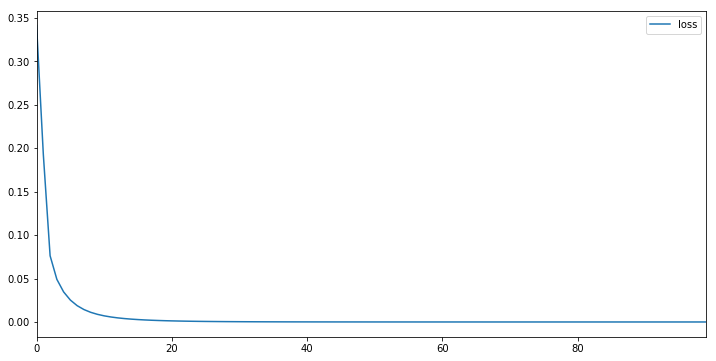

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

lossf = {'loss': [], 'epoch': []}
for epoch in range(100):
    model.zero_grad()
    
    rougue_preds = model(autograd.Variable(train_xs))
    loss = loss_function(rougue_preds, autograd.Variable(train_ys))
    loss.backward()
    optimizer.step()
    lossf['loss'].append(loss.data[0])
    lossf['epoch'].append(epoch)
    
perf = pd.DataFrame(lossf)

perf.plot(y='loss', figsize=(12, 6))
plt.show()

In [18]:
true_summaries[0]

Counter({0: 10,
         1: 1,
         2: 1,
         3: 13,
         4: 2,
         5: 1,
         6: 4,
         7: 1,
         8: 11,
         9: 14,
         10: 1,
         11: 1,
         12: 1,
         13: 1,
         14: 5,
         15: 17,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 11,
         24: 1,
         25: 1,
         26: 2,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 2,
         32: 12,
         33: 1,
         34: 1,
         35: 2,
         36: 1,
         37: 24,
         38: 1,
         39: 1,
         40: 1,
         41: 4,
         42: 1,
         43: 1,
         44: 6,
         45: 1,
         46: 2,
         47: 2,
         48: 2,
         49: 2,
         50: 1,
         51: 1,
         52: 1,
         53: 1,
         54: 1,
         55: 1,
         56: 1,
         57: 2,
         58: 1,
         59: 1,
         60: 2,
         61: 3,
         6